# Project Proposal Group 108

### Introduction

For our project we will analyze player stats for the Top 500 tennis players. Tennis is a racket sport played on courts throughout the world, but is particularly popular in Europe. Some major tournaments include Wimbledon, the US Open, the Australian Open, and the French Open. Our dataset contains a wide array of information on these players such as age, handedness, name, height, year turned pro, seasons, played, titles won, best season, etc.

The information on interest to us for our analysis are:

* Best Rank 
* Current Rank 
* Seasons 
* Age 
* Prize money

Through analyzing these columns we will aim to answer the following question:

* **Can you predict a tennis player's career earnings based on their profile?**


### Preliminary Data Analysis

In [41]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
install.package("psych")
library(

Lets first load in the data we plan to use

In [24]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
tennis <- read_csv(url)
head(tennis, n=8)

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


For our model, we focus only on the following: Best Rank, Current Rank. Seasons Played, and Age to predict Prize Money. Note that currently, the observations are all in different formats which makes it hard to use the data for furthere analysis. Furthermore only observations in which all predictors and prize money are nonempty are of importance to us:

In [25]:
colnames(tennis) <- make.names(colnames(tennis))
tennis <- tennis |>
    select(Age,  Current.Rank, Best.Rank, Prize.Money, Seasons)|>
    separate(col = Age,
             into= c("age", "Date"),
             sep = " ",
            convert = TRUE) |>
    separate(col = Current.Rank,
             into= c("current_rank", "date_of_rank"),
             sep = " ",
            convert = TRUE) |>
    separate(col = Best.Rank,
             into= c("best_rank", "date_or_best_rank"),
             sep = " ",
            convert = TRUE) |>
    select(age, current_rank, best_rank, Prize.Money, Seasons)
head(tennis, n= 8)

age,current_rank,best_rank,Prize.Money,Seasons
<int>,<int>,<int>,<chr>,<dbl>
26,378,363,NA,NA
18,326,316,"$59,040",NA
32,178,44,"US$3,261,567",14
21,236,130,"$374,093",2
27,183,17,"US$6,091,971",11
22,31,31,"$1,517,157",5
28,307,213,"$278,709",1
21,232,229,"$59,123",1


Now, we will clean the Prize.Money column and remove all empty observations.

In [26]:
tennis$Prize.Money <- gsub("US", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("all-time leader in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("11th", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("24th", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub("10th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("14th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("27th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("15th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("30th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("All-time leader in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("4th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("28th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("2nd", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("6th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("33rd", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("26th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("24th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("48th", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("41st", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("\\$","", tennis$Prize.Money)
tennis$Prize.Money <- sub(" ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("   ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub("  ", "", tennis$Prize.Money)
tennis$Prize.Money <- sub(" all-time in earnings", "", tennis$Prize.Money)
tennis$Prize.Money <- gsub(",", "", tennis$Prize.Money)

tennis <- tennis |>
        rename(seasons_played = Seasons)

tennis <- tennis |>
    mutate(prize_money = as.numeric(Prize.Money)) |>
    select(age, current_rank, best_rank, seasons_played, prize_money) |>
    na.omit()
head(tennis, n = 8)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,current_rank,best_rank,seasons_played,prize_money
<int>,<int>,<int>,<dbl>,<dbl>
32,178,44,14,3261567
21,236,130,2,374093
27,183,17,11,6091971
22,31,31,5,1517157
28,307,213,1,278709
21,232,229,1,59123
25,417,253,5,122734
20,104,104,3,74927


Now we need to split our data into training the testing datasets

In [33]:
tennis_split <- initial_split(tennis, prop = .75, strata = prize_money)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)


In [43]:
describeBy(tennis_train)

ERROR: Error in describeBy(tennis_train): could not find function "describeBy"


Let's observe how prize money changes relative to other predictors using a scatterplot.

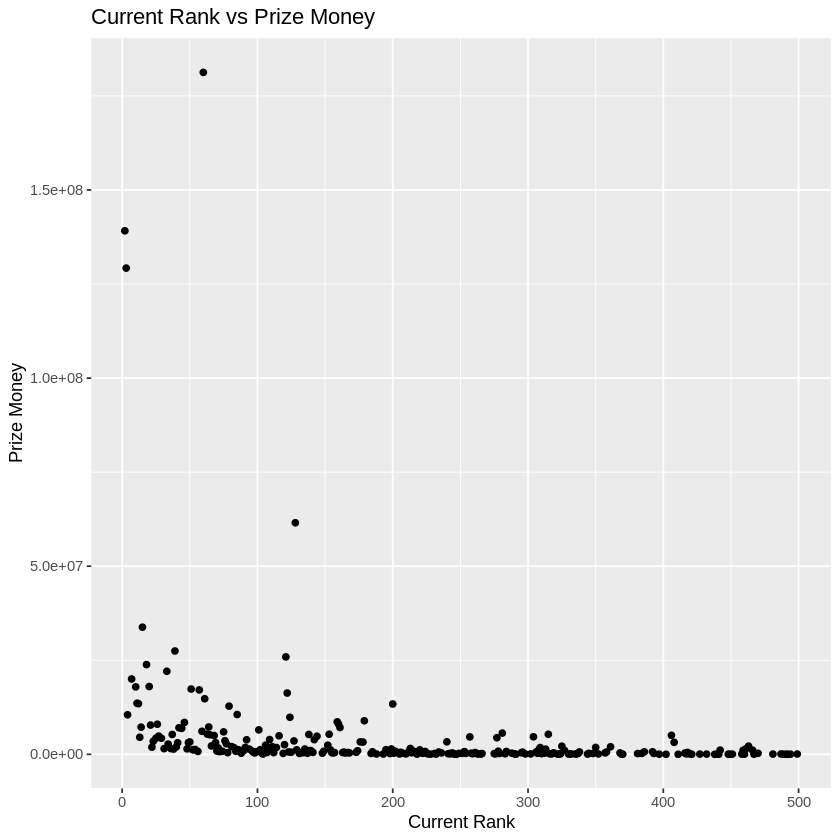

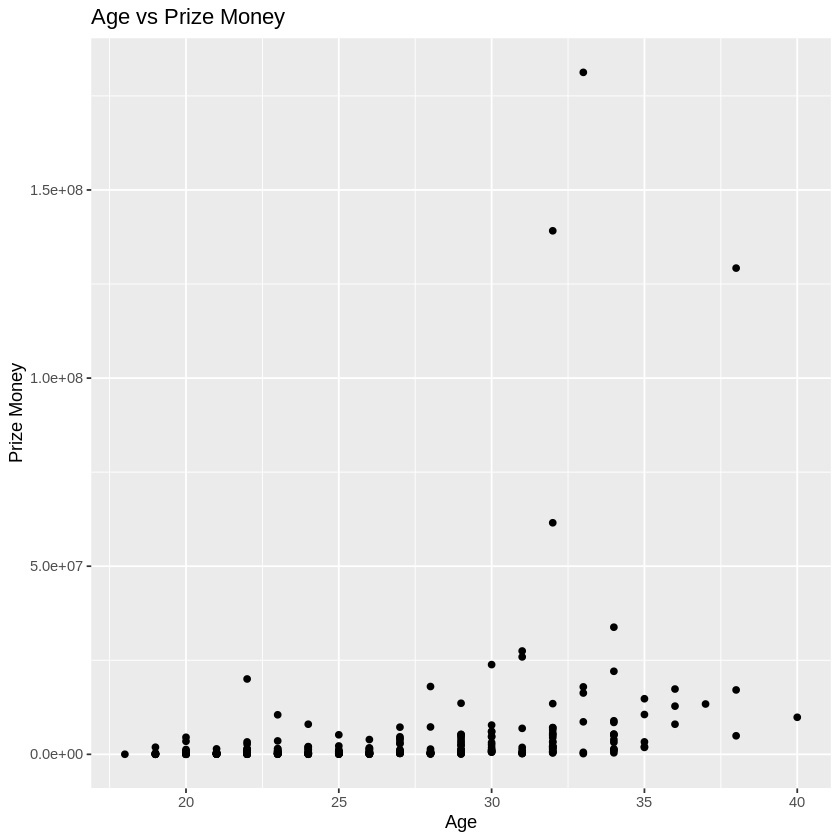

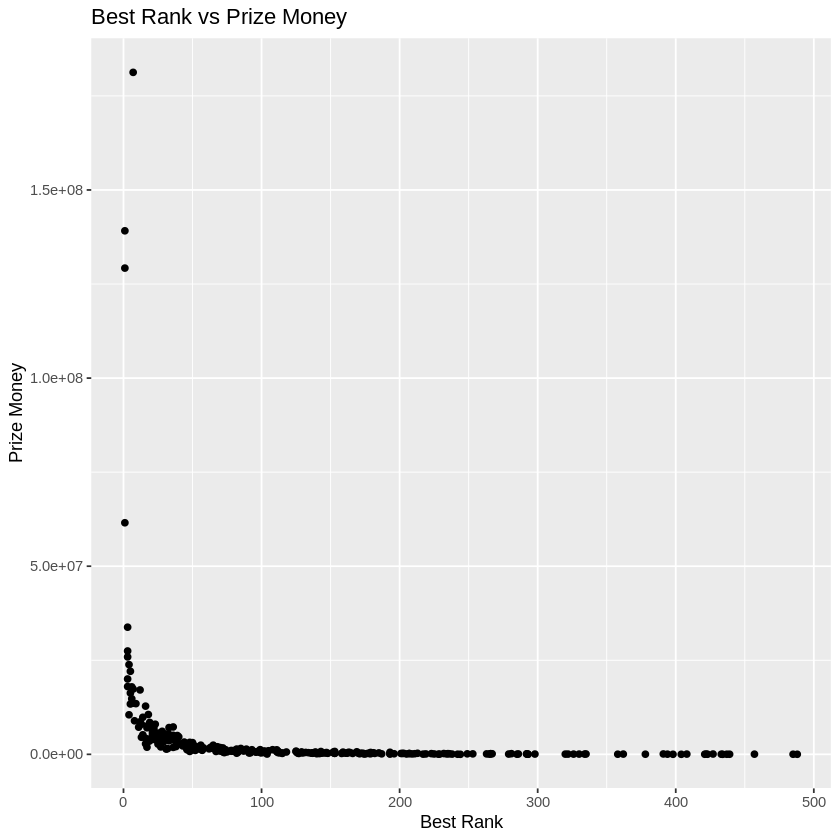

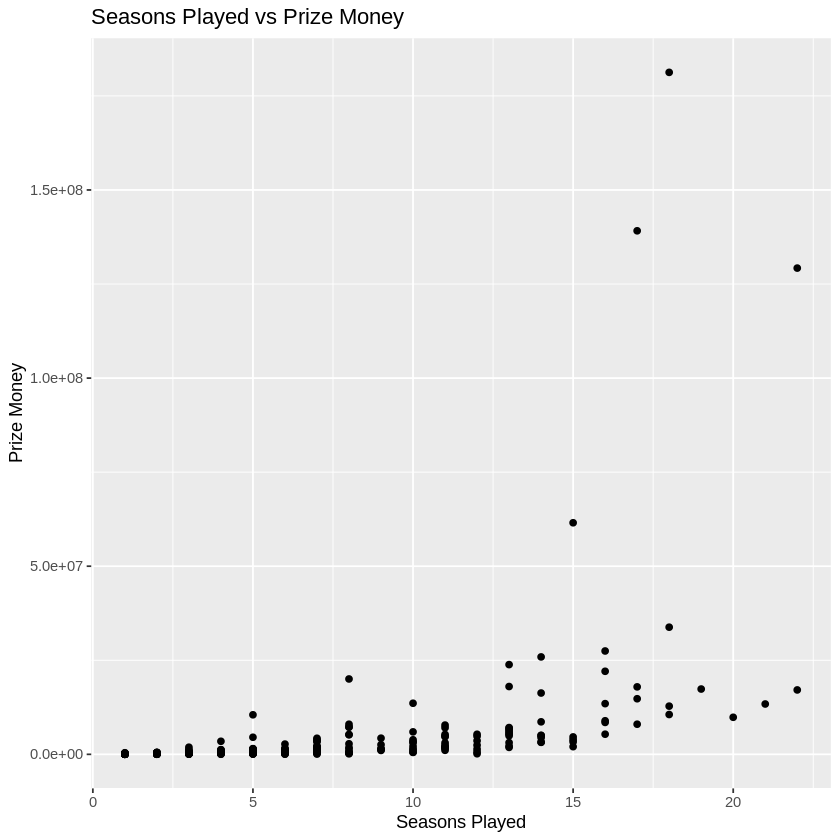

In [36]:
ggplot(tennis_train, aes(x=current_rank,y=prize_money))+
    geom_point() +
    labs(title = "Current Rank vs Prize Money", x="Current Rank", y = "Prize Money")
ggplot(tennis_train, aes(x=age,y=prize_money))+
    geom_point()+
    labs(title = "Age vs Prize Money", x="Age", y = "Prize Money")
ggplot(tennis_train, aes(x=best_rank,y=prize_money))+
    geom_point()+
    labs(title = "Best Rank vs Prize Money", x="Best Rank", y = "Prize Money")
ggplot(tennis_train, aes(x=seasons_played,y=prize_money))+
    geom_point()+
    labs(title = "Seasons Played vs Prize Money", x="Seasons Played", y = "Prize Money")


Age and Seasons Played both seem to have a positive relationship with Prize Money, Best Rank and Current Rank have a negative relationship with Prize Money similar to exponential decay.

### Methods

Since all the variables are quantitative, we will use the K-nearest neighbors regression model to analyze the data. The data will be split with 75% in the training set. All predictors will be standardized (scaled and centered) and the number of neighbors will be determined through cross validation. The training data will be split into five equal portions and the number of neighbors used in the final model will correspond with the smallest estimated error from the cross validation tests. The model will be retrained using the ideal number of neighbors on the training set and evaluated by determining its standard error on the testing set. Furthermore, each predictor will undergo this process on its own to determine whether adding more predictors decreases the error in the predictions.

To visualize our results, we will create a scatter plot with Prize money on the y-axis and a predictor on the x-axis. Each predictor will be plotted separately with a coloured line that represents the predicted prize money from the model with that predictor only.


### Expected Outcomes

We are expecting the older players with more experience (i.e played more seasons) to have a better rank and overall  leading to higher career earnings. This is because experience is a key factor in winning sports hence leading to a higher chance of said players to win tournaments resulting in more career earnings.

We will be able to create a model which could accurately predict a future tennis player’s lifetime prize money based on their projected seasons, highest rank attainable and the age they would like to retire. This would be a good path finder for such future players who in turn can understand their future goals and hence be fueled with motivation.

What other variables affect career earnings in tennis?
How does tennis’s prize money model compare with other sports' prize money model?
